In [1]:
import sys
sys.path.append('C:\\Users\\sumaiyah\\Documents\\Univeristy\\diss\\misuse-AIaaS')

# Import filepaths
from notebooks import FIC_FED_AMA_10minute_7days_filepath, FIC_FED_AMA_60minute_7days_filepath

In [16]:
import numpy as np
import pandas as pd
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from statistics import mean

from timeit import default_timer as timer
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset

-------------------------------

# For FIC_FED_AMA_60minute_7days_filepath

In [3]:
FIC_FED_AMA_60minute_7days_df = pd.read_pickle(FIC_FED_AMA_60minute_7days_filepath)

# Rename columns of merged dataframe depending on what m is
m = 60
col_names = ['HashOwner', 'HashApp', 'HashFunction','Trigger'] + \
            ['fic_%d' % i for i in range(int(7 * (1440 / m)))] + \
            ['fed_%d' % i for i in range(int(7 * (1440 / m)))] + \
            ['ama_%d' % i for i in range(int(7 * (1440 / m)))]
FIC_FED_AMA_60minute_7days_df.columns = col_names
FIC_FED_AMA_60minute_7days_df = FIC_FED_AMA_60minute_7days_df.drop(columns=FIC_FED_AMA_60minute_7days_df.columns[0:4])

In [4]:
# Preprocess data
FIC_FED_AMA_60minute_7days_df = TimeSeriesScalerMeanVariance().fit_transform(FIC_FED_AMA_60minute_7days_df)

# Need values in specific shape for tslearn clustering
FIC_FED_AMA_60minute_7days_vals = to_time_series_dataset(FIC_FED_AMA_60minute_7days_df)
print(FIC_FED_AMA_60minute_7days_vals.shape)

# sz = FIC_FED_AMA_60minute_7days_vals.shape[1]

(62130, 504, 1)


## K-means

In [ ]:
nc = [2, 3, 5, 9, 30]
for k in nc:
    print('Results of K-means Clustering with k=%d' % k)
    
    start = timer()

    km = TimeSeriesKMeans(n_clusters=k, verbose=False, random_state=42, n_jobs=-1)
    kmeans_predictions = km.fit_predict(FIC_FED_AMA_60minute_7days_vals)

    end = timer()
    print('Clustering k=%d took %f seconds' % (k, (end - start)))

    km_clusters = pd.Series(kmeans_predictions)
    print(km_clusters.value_counts())
    print(km_clusters.value_counts().values.tolist(), '\n')

-------------------------------

# For FIC_FED_AMA_10minute_7days_filepath

In [5]:
FIC_FED_AMA_10minute_7days_df = pd.read_pickle(FIC_FED_AMA_10minute_7days_filepath)

# Rename columns of merged dataframe depending on what m is
m = 10
col_names = ['HashOwner', 'HashApp', 'HashFunction','Trigger'] + \
            ['fic_%d' % i for i in range(int(7 * (1440 / m)))] + \
            ['fed_%d' % i for i in range(int(7 * (1440 / m)))] + \
            ['ama_%d' % i for i in range(int(7 * (1440 / m)))]
FIC_FED_AMA_10minute_7days_df.columns = col_names
FIC_FED_AMA_10minute_7days_df = FIC_FED_AMA_10minute_7days_df.drop(columns=FIC_FED_AMA_10minute_7days_df.columns[0:4])

In [6]:
# Preprocess data
FIC_FED_AMA_10minute_7days_df = TimeSeriesScalerMeanVariance().fit_transform(FIC_FED_AMA_10minute_7days_df)

# Need values in specific shape for tslearn clustering
FIC_FED_AMA_10minute_7days_vals = to_time_series_dataset(FIC_FED_AMA_10minute_7days_df)
print(FIC_FED_AMA_10minute_7days_vals.shape)

# sz = FIC_FED_AMA_10minute_7days_vals.shape[1]

(62130, 3024, 1)


## K-means

In [ ]:
nc = [2, 3, 5, 9, 30]
for k in nc:
    print('Results of K-means Clustering with k=%d' % k)
    
    start = timer()

    km = TimeSeriesKMeans(n_clusters=k, verbose=False, random_state=42, n_jobs=-1)
    kmeans_predictions = km.fit_predict(FIC_FED_AMA_10minute_7days_vals)

    end = timer()
    print('Clustering k=%d took %f seconds' % (k, (end - start)))

    km_clusters = pd.Series(kmeans_predictions)
    print(km_clusters.value_counts())
    print(km_clusters.value_counts().values.tolist(), '\n')

## TODO
- Decide which results to plot and how to plot them? maybe just plotting the centers of each of the clusters?
- Plot results run this code on big machine and then plot results

| Clustering |    | 1 min                                                         |             | 10 mins                                                       |            | 60 mins                                                       |            |
|------------|----|---------------------------------------------------------------|-------------|---------------------------------------------------------------|------------|---------------------------------------------------------------|------------|
|            | nc | Cluster Sizes                                                 | Time (s)    | Cluster Sizes                                                 | Time (s)   | Cluster Sizes                                                 | Time (s)   |
| k-means    | 2  | [59181, 2949]                                                 | 498.457382  | [58741, 3389]                                                 | 92.451704  | [47733, 14397]                                                | 34.601465  |
|            | 3  | [47289, 12175, 2666]                                          | 481.225274  | [48796, 10351, 2983]                                          | 83.940074  | [34025, 15109, 12996]                                         | 104.648173 |
|            | 5  | [43763, 7657, 4816, 3529, 2365]                               | 1101.693500 | [42765, 7805, 7281, 2961, 1318]                               | 331.303520 | [24751, 12042, 11724, 10494, 3119]                            | 86.494178  |
|            | 9  | [43825, 5442, 3761, 3517, 2317, 1471, 1340, 315, 142]         | 1364.768839 | [42050, 6960, 6501, 2138, 1829, 1314, 670, 392, 276]          | 254.810821 | [25824, 10968, 6219, 5572, 5100, 2321, 2278, 2078, 1770]      | 137.590370 |
|            | 30 | [34778, 2950, 2381, 2221, 2063, ..., 267, 266, 260, 173, 120] | 2820.403851 | [26693, 5941, 5359, 2207, 2180, ..., 228, 221, 207, 207, 180] | 690.938966 | [19651, 8260, 3703, 3578, 2917, ..., 572, 569, 478, 469, 399] | 179.679165 |

# Plot results for k=9

In [39]:
k = 5

In [40]:
# kmeans for k=9 60 mins
print('Results of K-means Clustering with k=%d' % k)
    
km9_60 = TimeSeriesKMeans(n_clusters=k, verbose=False, random_state=42, n_jobs=-1)
km9_60_predictions = km9_60.fit_predict(FIC_FED_AMA_60minute_7days_vals)

km9_60_clusters = pd.Series(km9_60_predictions)
print(km9_60_clusters.value_counts())
print(km9_60_clusters.value_counts().values.tolist(), '\n')

Results of K-means Clustering with k=5
1    24751
0    12042
2    11724
3    10494
4     3119
dtype: int64
[24751, 12042, 11724, 10494, 3119] 



In [41]:
# kmeans for k=9 10 mins
print('Results of K-means Clustering with k=%d' % k)
    
km9_10 = TimeSeriesKMeans(n_clusters=k, verbose=False, random_state=42, n_jobs=-1)
km9_10_predictions = km9_10.fit_predict(FIC_FED_AMA_10minute_7days_vals)

km9_10_clusters = pd.Series(km9_10_predictions)
print(km9_10_clusters.value_counts())
print(km9_10_clusters.value_counts().values.tolist(), '\n')

Results of K-means Clustering with k=5
3    42765
1     7805
4     7281
0     2961
2     1318
dtype: int64
[42765, 7805, 7281, 2961, 1318] 



In [42]:
colours = ['tab:red', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:gray', 'tab:brown']

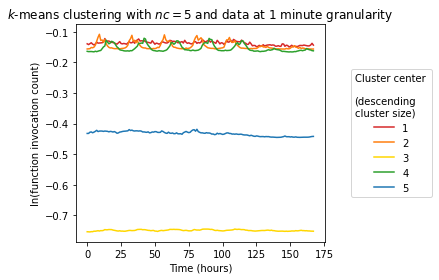

In [59]:
cluster_order = pd.Series(km9_60_predictions).value_counts().keys().tolist()
for yi in range(len(cluster_order)):
    cluster_index = cluster_order[yi]
    
    plt.plot(km9_60.cluster_centers_[cluster_index].ravel()[:int(7 * (1440 / 60))], color=colours[yi])
    
# show a legend on the plot
plt.legend(# The line objects
           labels=['%d' % (i+1) for i in range(k)],   # The labels for each line
           loc='center left', bbox_to_anchor=(1.1, 0.5),  # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Cluster center \n\n(descending\ncluster size)"  # Title for the legend
           )

plt.title('$k$-means clustering with $nc=5$ and data at 1 minute granularity')
plt.xlabel('Time (hours)')
plt.ylabel('ln(function invocation count)')
    
plt.tight_layout()
# Display a figure.
plt.show()

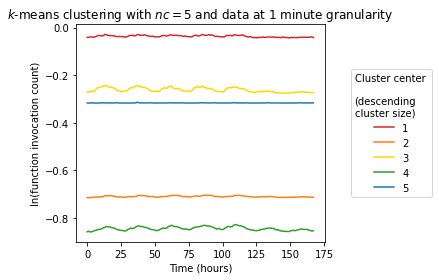

In [66]:
cluster_order = pd.Series(km9_10_predictions).value_counts().keys().tolist()
for yi in range(len(cluster_order)):
    cluster_index = cluster_order[yi]  
    # Smooth out over 60 mins
    clusters_10min = km9_10.cluster_centers_[cluster_index].ravel()[:int(7 * (1440 / 10))]
    smooth_step = 6
    smooth = []
    for i in range(0, len(clusters_10min), smooth_step):
        smooth.append(mean(clusters_10min[i:i+smooth_step]))
    # Plot
    plt.plot(smooth, color=colours[yi])
    
plt.legend(# The line objects
           labels=['%d' % (i+1) for i in range(k)],   # The labels for each line
           loc='center left', bbox_to_anchor=(1.1, 0.5),  # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Cluster center \n\n(descending\ncluster size)"  # Title for the legend
           )

plt.title('$k$-means clustering with $nc=5$ and data at 1 minute granularity')
plt.xlabel('Time (hours)')
plt.ylabel('ln(function invocation count)')
    
plt.tight_layout()
# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('test2png.png', dpi=100)

# Display a figure.
plt.show()

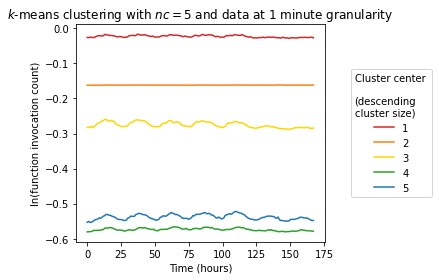

In [57]:
smoothed_1min_cluster = pd.read_pickle('misc/ficfedama_1min_km5_clusters.pkl')
i = 0
for col in smoothed_1min_cluster.columns:
    plt.plot(smoothed_1min_cluster[col].values, color=colours[i])
    i += 1

plt.legend(# The line objects
           labels=['%d' % (i+1) for i in range(k)],   # The labels for each line
           loc='center left', bbox_to_anchor=(1.1, 0.5),  # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Cluster center \n\n(descending\ncluster size)"  # Title for the legend
           )

plt.title('$k$-means clustering with $nc=5$ and data at 1 minute granularity')
plt.xlabel('Time (hours)')
plt.ylabel('ln(function invocation count)')

plt.tight_layout()

# Display a figure.
plt.show()

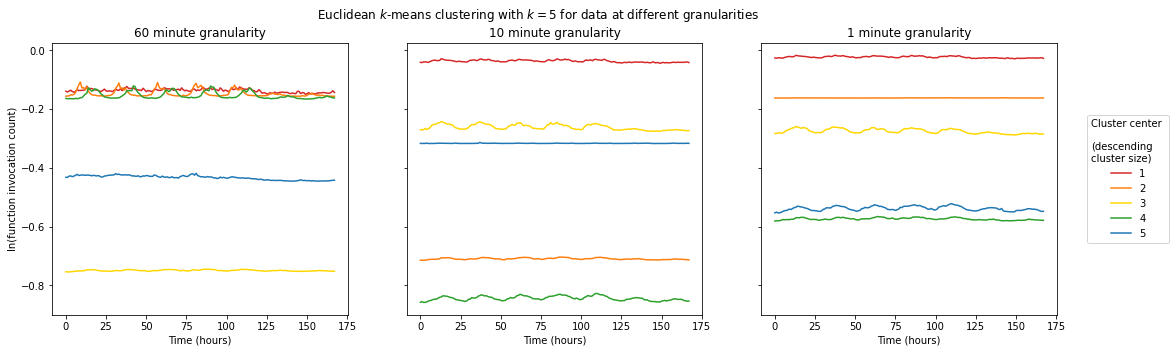

In [92]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.set_size_inches(18, 5)
fig.suptitle('Euclidean $k$-means clustering with $k=5$ for data at different granularities')

# ----------------------------------------------------------------------------------------------------------
# 60 min granularity
cluster_order = pd.Series(km9_60_predictions).value_counts().keys().tolist()
for yi in range(len(cluster_order)):
    cluster_index = cluster_order[yi]
    # Plot
    ax1.plot(km9_60.cluster_centers_[cluster_index].ravel()[:int(7 * (1440 / 60))], color=colours[yi])
ax1.title.set_text('60 minute granularity')
ax1.set(xlabel='Time (hours)', ylabel='ln(function invocation count)')

    
# 10 min granularity
cluster_order = pd.Series(km9_10_predictions).value_counts().keys().tolist()
for yi in range(len(cluster_order)):
    cluster_index = cluster_order[yi]  
    # Smooth out over 60 mins
    clusters_10min = km9_10.cluster_centers_[cluster_index].ravel()[:int(7 * (1440 / 10))]
    smooth_step = 6
    smooth = []
    for i in range(0, len(clusters_10min), smooth_step):
        smooth.append(mean(clusters_10min[i:i+smooth_step]))
    # Plot
    ax2.plot(smooth, color=colours[yi])
ax2.title.set_text('10 minute granularity')
ax2.set(xlabel='Time (hours)', ylabel='')


# 1 min granularity
smoothed_1min_cluster = pd.read_pickle('misc/ficfedama_1min_km5_clusters.pkl')
i = 0
for col in smoothed_1min_cluster.columns:
    ax3.plot(smoothed_1min_cluster[col].values, color=colours[i])
    i += 1
ax3.title.set_text('1 minute granularity')
ax3.set(xlabel='Time (hours)', ylabel='')
# ----------------------------------------------------------------------------------------------------------

ax3.legend(# The line objects
           labels=['%d' % (i+1) for i in range(k)],   # The labels for each line
           loc='center left', bbox_to_anchor=(1.1, 0.5),  # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Cluster center \n\n(descending\ncluster size)"  # Title for the legend
           )

fig.savefig('figs/final/test2.png', dpi=200)